In [2]:
# importing dependencies
import pandas as pd
import seaborn as sns
data = pd.read_csv("cardata.csv")

In [3]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
data.shape

(301, 9)

In [5]:
# looking at the features 
print("Seller_Type:", data["Seller_Type"].unique())
print("Transmission:", data["Transmission"].unique())
print("Owner:", data["Owner"].unique())
print("Fuel_Type:", data["Fuel_Type"].unique())

Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']
Owner: [0 1 3]
Fuel_Type: ['Petrol' 'Diesel' 'CNG']


In [6]:
# check for missing values 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# looking at some numbers
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# checking labels in the columns
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# selecting only the columns of interest

final_df = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# adding a new column to the data set to calculate the age of the car

final_df["current year"] = 2022
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [11]:
# adding a new column that will have the age of the car
final_df["number of years"] = final_df["current year"] - final_df["Year"]
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,number of years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [12]:
# dropping year and current year columns  
final_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'current year',
       'number of years'],
      dtype='object')

In [14]:
car_df = final_df.drop(columns=["Year", "current year"])

In [17]:
# new data frame
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [18]:
# Convert categorical values into numerical 
car_df = pd.get_dummies(car_df, drop_first=True)
car_df.head(20)

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
5,9.25,9.83,2071,0,4,1,0,0,1
6,6.75,8.12,18796,0,7,0,1,0,1
7,6.50,8.61,33429,0,7,1,0,0,1
8,8.75,8.89,20273,0,6,1,0,0,1
9,7.45,8.92,42367,0,7,1,0,0,1


In [19]:
# finding the correlation 
car_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


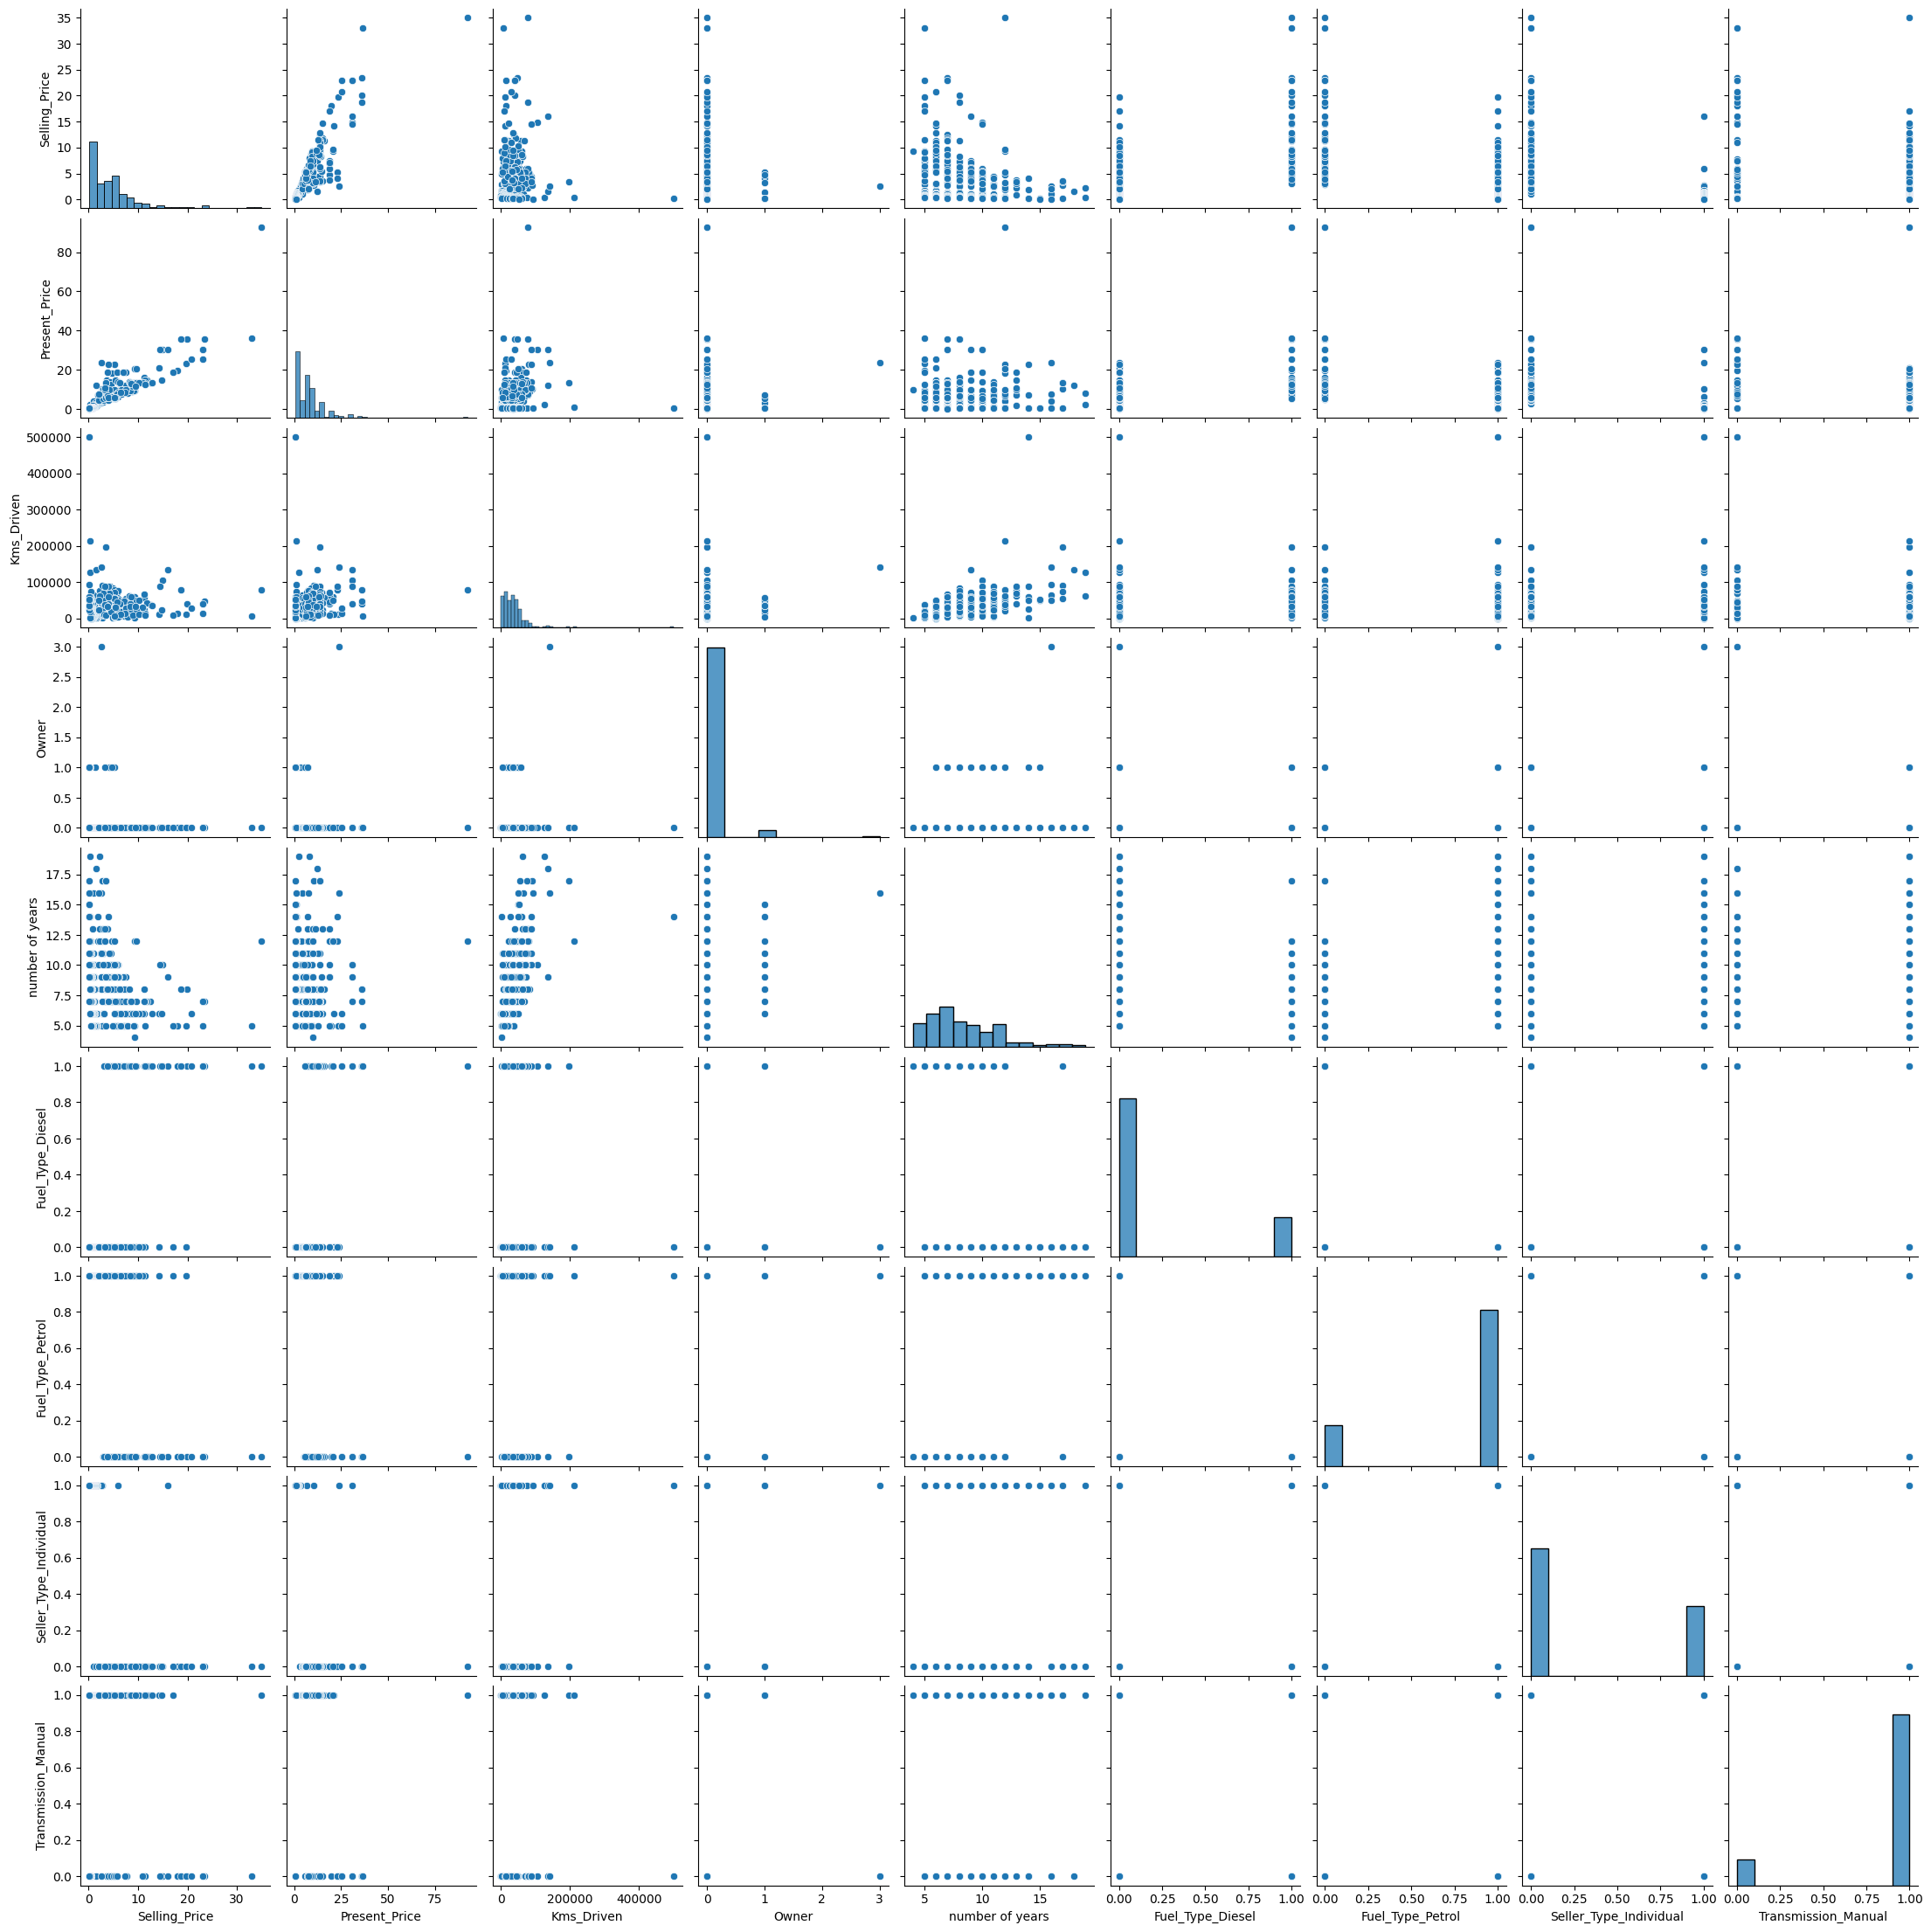

In [20]:
# mapping correlations 
import seaborn as sns
sns.pairplot(car_df)

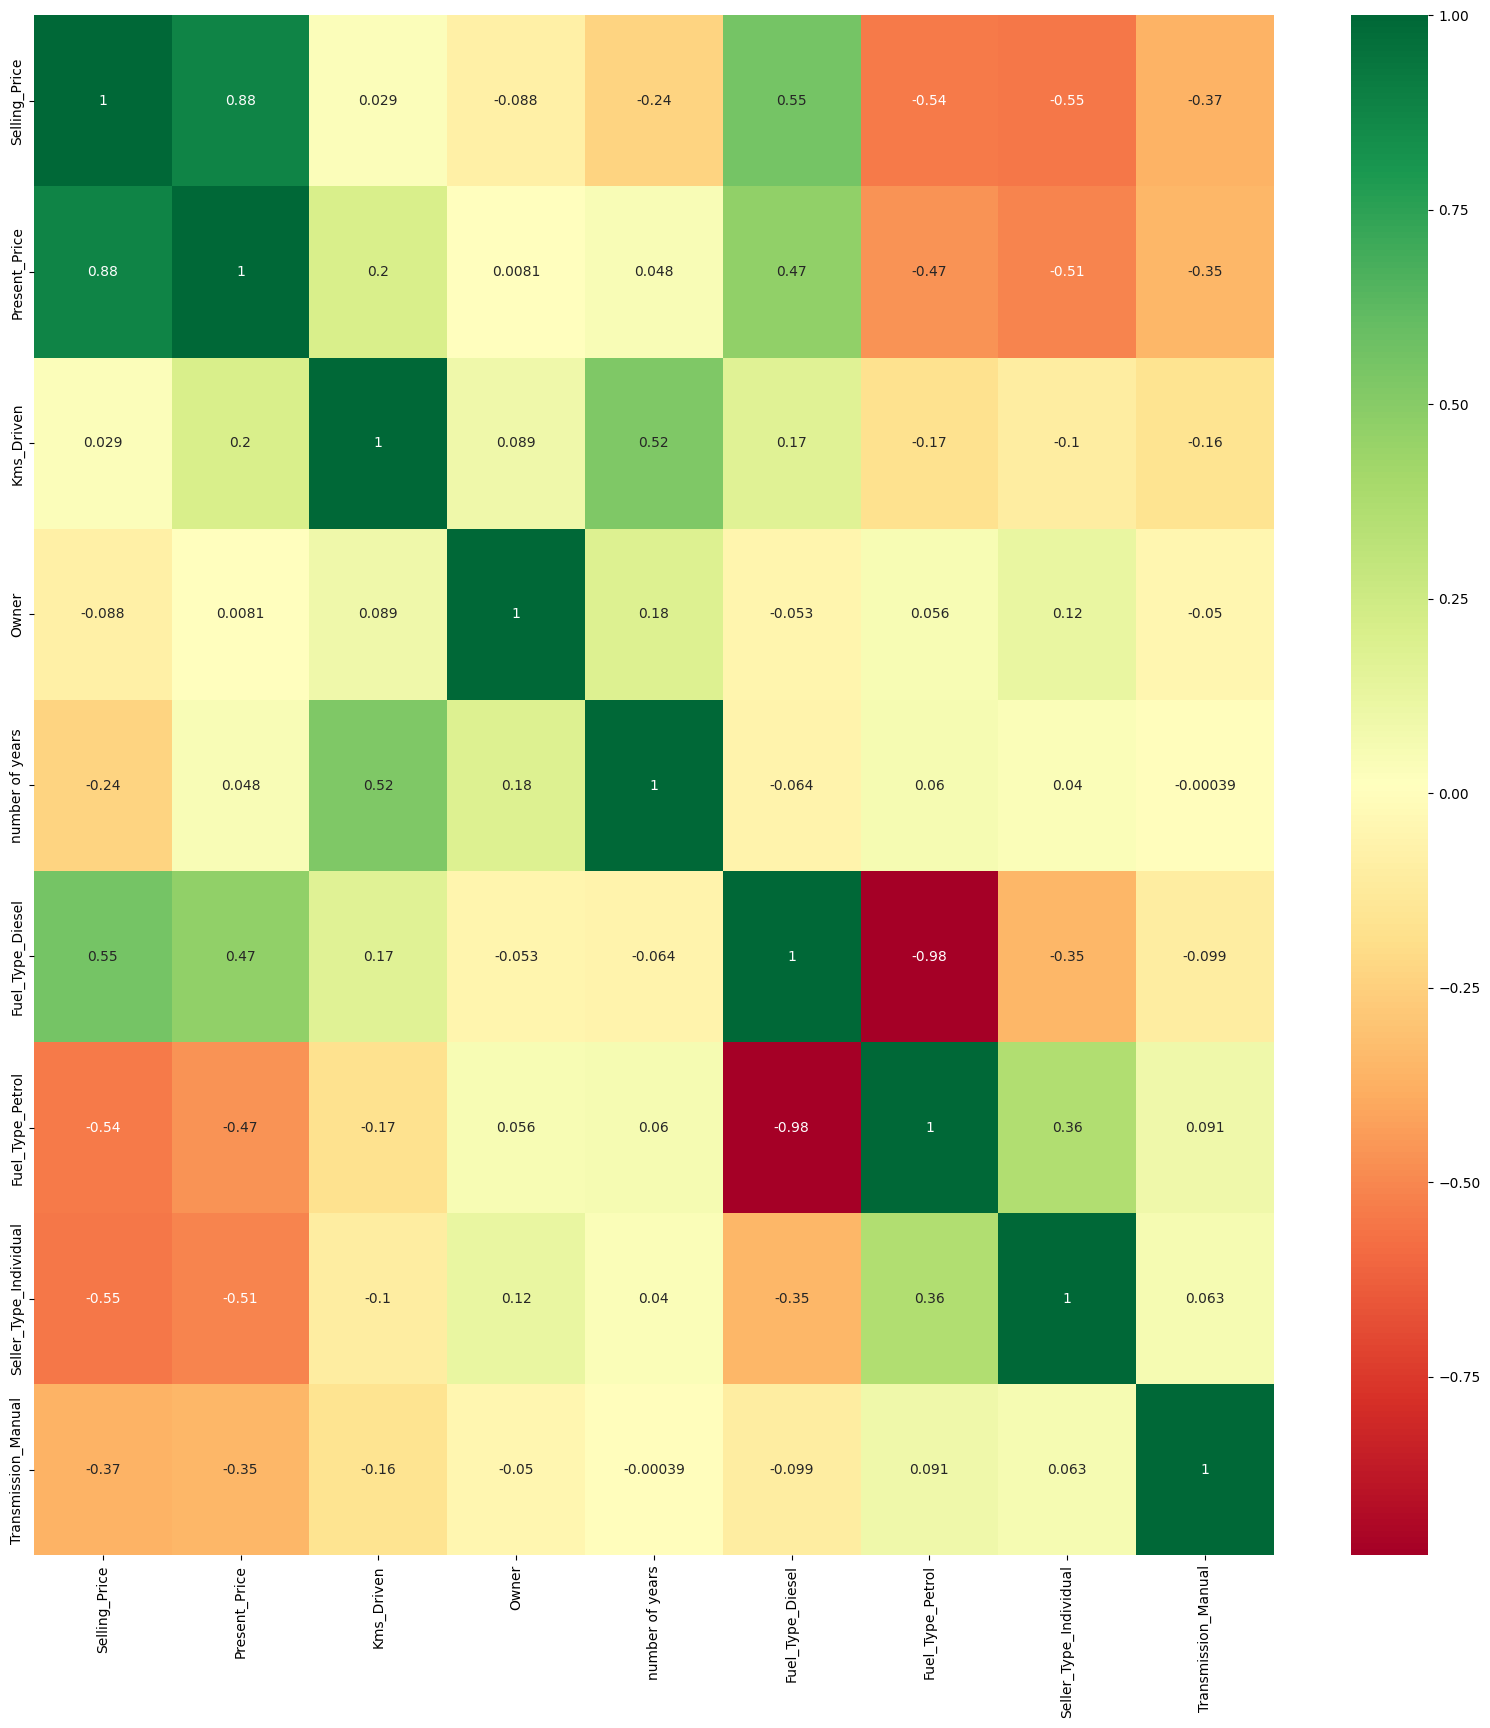

In [21]:
# mapping correlations on a heat map
import matplotlib.pyplot as plt

corrmat = car_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
graphic = sns.heatmap(car_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [22]:
# dividing the data
X=car_df.iloc[:,1:]
y=car_df.iloc[:,0]

In [23]:
print(y.head())
print(X.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64
   Present_Price  Kms_Driven  Owner  number of years  Fuel_Type_Diesel  \
0           5.59       27000      0                8                 0   
1           9.54       43000      0                9                 1   
2           9.85        6900      0                5                 0   
3           4.15        5200      0               11                 0   
4           6.87       42450      0                8                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  


In [24]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [25]:
# improving predictive accuracy  
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.39795768 0.04014655 0.00057164 0.07820588 0.2153575  0.00807725
 0.13100364 0.12867987]


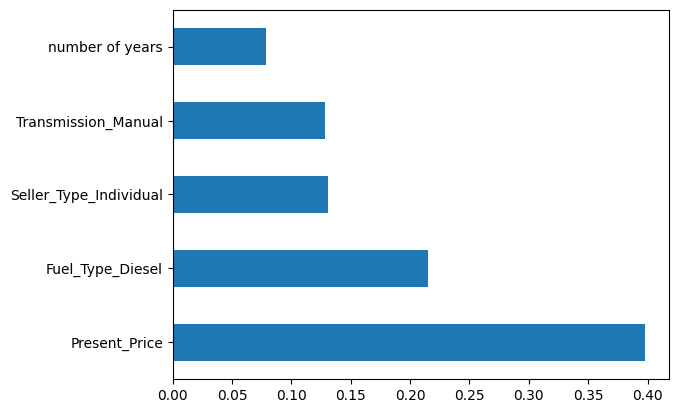

In [27]:
# plotting feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [28]:
# setting a side a validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(240, 8)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [31]:
# getting some hypermiters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# number of feature consider at every split
max_features = [1.0, "sqrt"]
# maximun number of levels in a  tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)

[5, 10, 15, 20, 25, 30]


In [34]:
# minimum number of sample required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# minimum number of samples required at each leaf node 
min_samples_leaf = [1, 2, 5, 10]

In [35]:
# creating a dictionary for the ramdom grid, randomized search cv cross validation
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [36]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': [1.0, 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
# random grid to find the best hyperparameters
# creating the model
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(rf, param_distributions=random_grid,
                               scoring="neg_mean_squared_error",
                               n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [38]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
# testing predictions
prediction = rf_random.predict(X_test)
print(prediction)

[ 8.98954    3.2327     5.97875    0.45809    5.072      2.71432
  3.0827    13.06119    0.84629    9.24471    2.81628    5.9616
  8.03392    0.98502    1.20374   22.01899    0.47726    6.19388
  5.30947    3.78142    4.0616     0.60247    2.97604    0.47291
  0.68256    5.26984    6.86204    3.69466    7.70316    3.5244
  2.71194    6.35971    4.55025   11.3215     2.79897    0.35595
  7.04567    4.9055     5.77565    0.35014    2.9793     4.15726
  0.49635    0.47281    1.16478   11.07419    0.65321    8.25125
  1.37745    3.74647   10.58573    2.95071    2.52945    0.28535
  4.1325     7.4696     0.43463   20.77751    3.8074275  0.515
 15.81698  ]


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

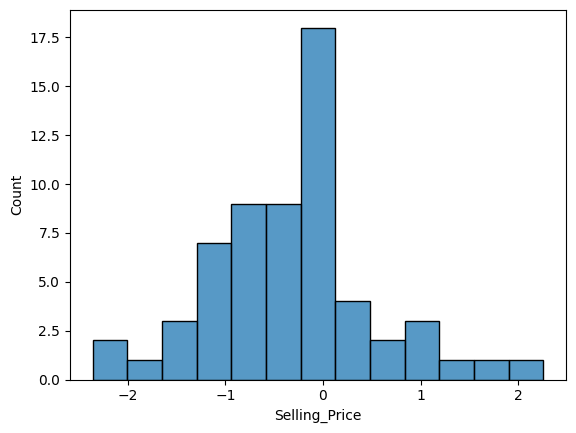

In [40]:
# compering predictions to the true value
sns.histplot(y_test-prediction)

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

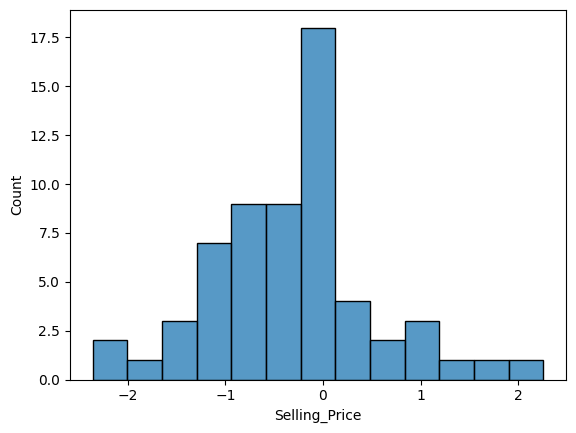

In [41]:
# compering predictions to the true values
sns.histplot(y_test-prediction)

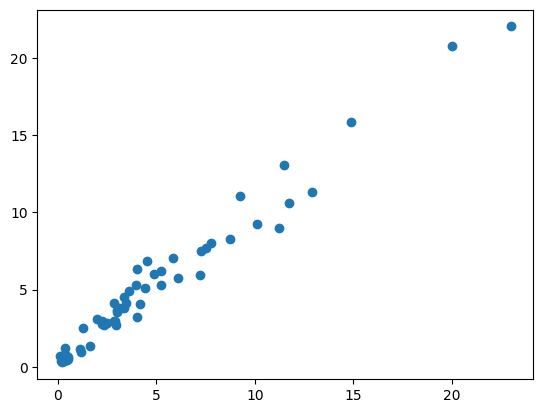

In [42]:
# doble checking prediction 
plt.scatter(y_test,prediction)

In [43]:
# importing metrics 
from sklearn import metrics

In [44]:
# getting the root mean squered error
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.6829414344262313
MSE: 0.8218288948550356
RMSE: 0.9065477896145551


In [51]:
# testing the model.
new_data= X_test.iloc[[1]]
print(new_data)
prediction_n = rf_random.predict(new_data)
print(prediction_n)
print(y_test.head())

     Present_Price  Kms_Driven  Owner  number of years  Fuel_Type_Diesel  \
248            4.6       30000      0                9                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
248                 1                       0                    1  
[3.2327]
212    11.25
248     4.00
21      4.90
188     0.25
202     4.40
Name: Selling_Price, dtype: float64


In [40]:
# creating pickle file for deployment
import pickle

file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(rf_random, file)